<a href="https://colab.research.google.com/github/niedakaito/EU_M_Math/blob/main/Chap04_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 4-1 確立と統計を学ぶ準備

In [1]:
# 以下のライブラリを使う
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

# chapter 4-2 確立

In [2]:
# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

In [3]:
# 引数は、対象データdice_dataから1つランダムに抽出するという意味
print('1つだけランダムに抽出する', np.random.choice(dice_data, 1))

1つだけランダムに抽出する [5]


In [4]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1～6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
  p = len(dice_rolls[dice_rolls==i]) / calc_steps
  print(i, 'が出る確率', p)


1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


# chapter 4-3 確立変数と確率分布

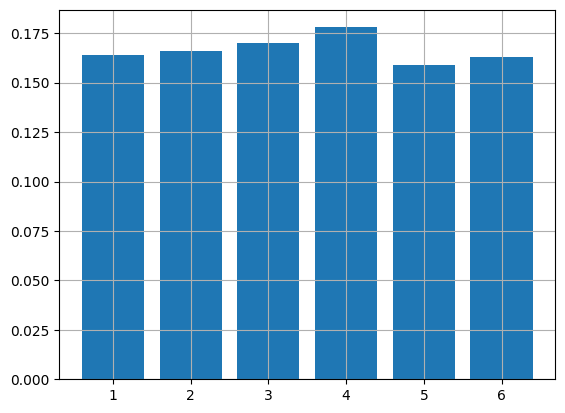

In [5]:
# 一様分布
# サイコロを1000回振ってみる
calc_steps = 1000

# 1～6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1, 7):
  p = len(dice_rolls[dice_rolls==i]) / calc_steps
  prob_data = np.append(prob_data, len(dice_rolls[dice_rolls[dice_rolls==i]]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

In [6]:
# ベルヌーイの定理
# 0:head(表）、1:tail（裏）と考える
# サンプル数を8とした
prob_be_data = ([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出（個々の場合は、0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


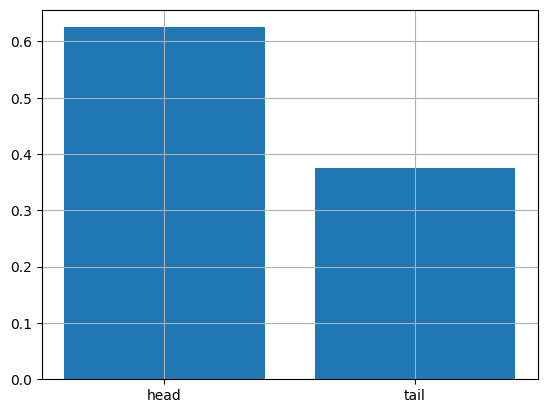

In [7]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

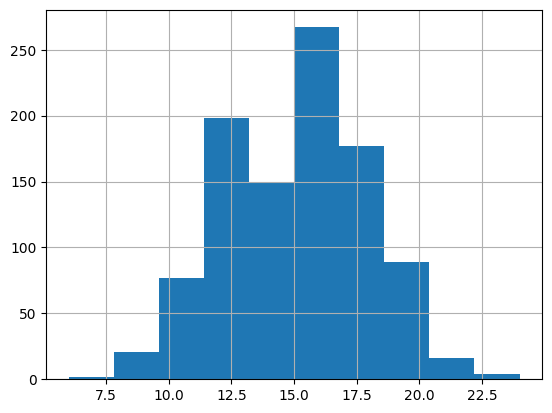

In [8]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

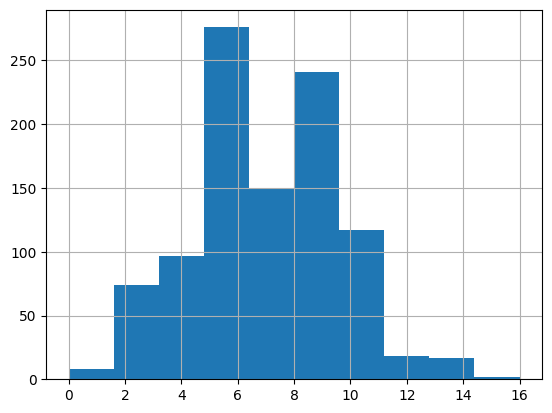

In [9]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

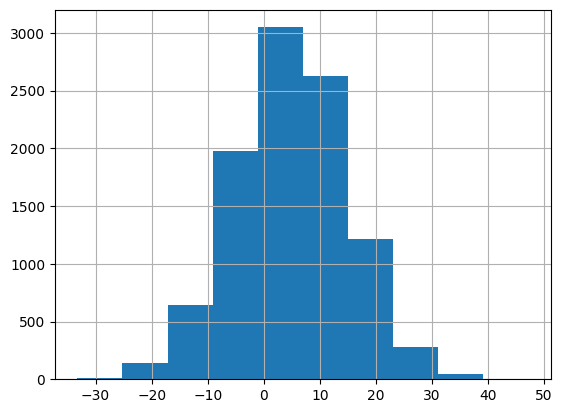

In [10]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

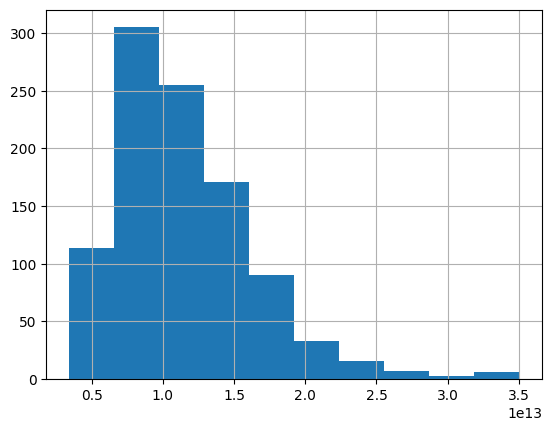

In [11]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

In [12]:
pwd

'/content'

In [13]:
mkdir chap3

In [14]:
cd /content/chap3/

/content/chap3


In [15]:
import requests, zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [16]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [17]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

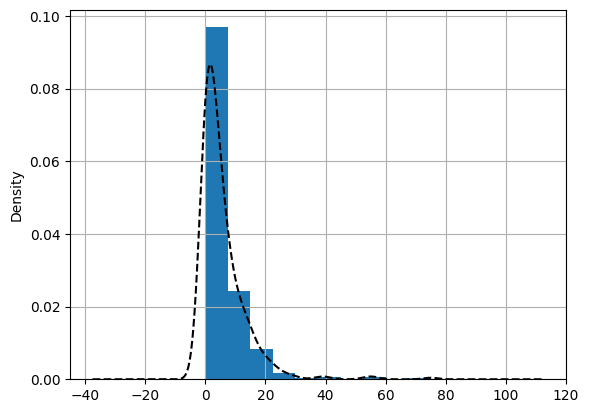

In [18]:
# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

# chapter 4-4 応用：多次元確立分布

In [19]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2,))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [20]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の列では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になる
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確立密度関数
z = rv.pdf(pos)

In [21]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x, y, zラベルの設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

<Figure size 640x480 with 0 Axes>

# chapter 4-5 推計統計学

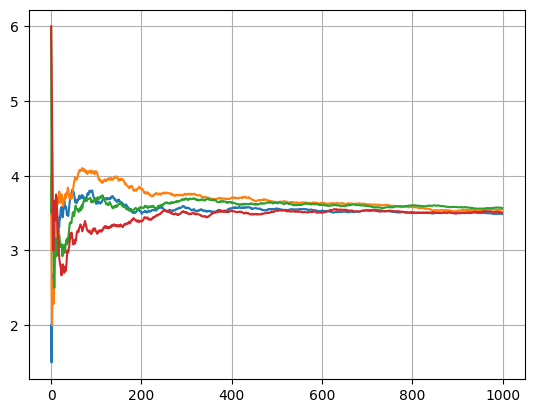

In [22]:
# 大数の法則
# 計算回数
calc_times = 1000
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのパスを生成
for i in range(4):
  p = np.random.choice(sample_array, calc_times).cumsum()
  plt.plot(p / number_cnt)
  plt.grid(True)

In [27]:
# 中心極限定理
def function_central_theory(N):

  sample_array = np.array([1, 2, 3, 4, 5, 6])
  number_cnt = np.arange(1, 1 + N) * 1.0

  mean_array = np.array([])

  for i in range(1000):
      cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
      mean_array = np.append(mean_array, cum_variables[N-1] / N)

  plt.hist(mean_array)
  plt.grid(True)

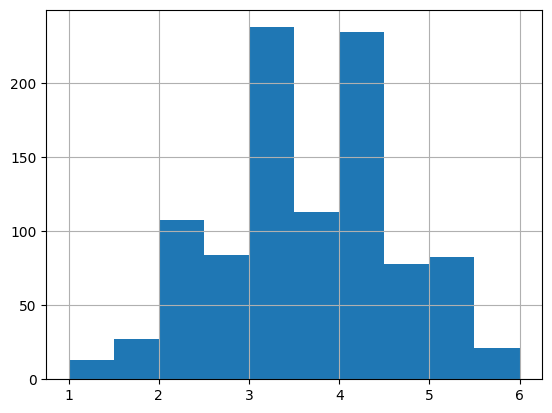

In [28]:
# N = 3
function_central_theory(3)

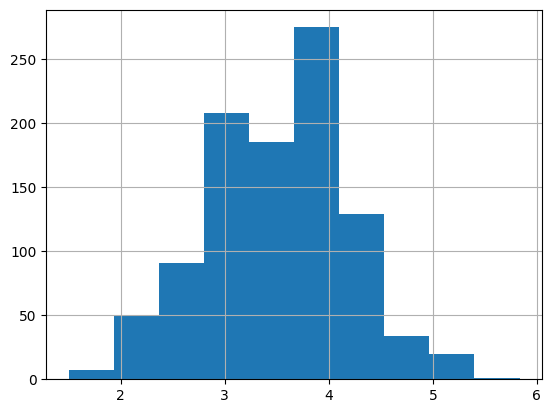

In [29]:
# N = 6
function_central_theory(6)

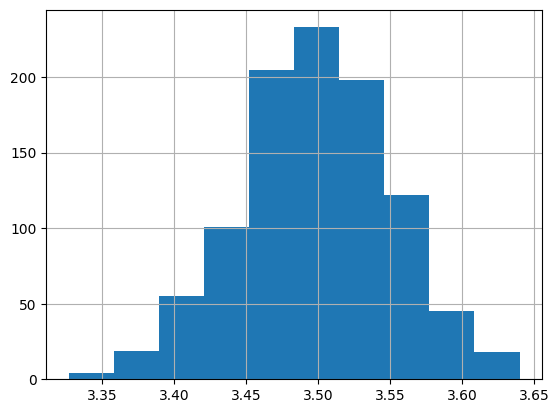

In [30]:
# N = 10^3
function_central_theory(10**3)

# chapter 4-7 統計的検定

In [34]:
# 数学のデータを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# ポルトガルのデータを読み込む
student_data_por = pd.read_csv('student-por.csv', sep=';')

# マージする
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize'
                                    , 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'reason'
                                    , 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1数学の成績平均：', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', student_data_merge.G1_por.mean())

G1数学の成績平均： 10.85925925925926
G1ポルトガル語の成績平均： 12.098765432098766


In [36]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p値 = ', p)

p値 =  3.3388106906287995e-16
